In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


In [17]:
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis=0)


In [19]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # missclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
                
        if has_converged(X, y ,w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

In [24]:
print('PLA: \n', w[-1], '\nafter %d' %len(m))

PLA: 
 [[ 3.6864918 ]
 [-4.08776229]
 [ 4.1502239 ]] 
after 18


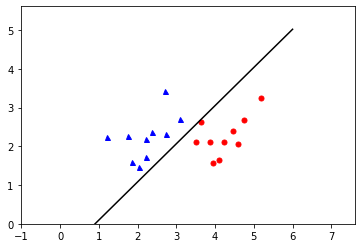

In [74]:
# Show data points on Plot
plt.plot(X0[0, :], X0[1, :], 'b^', markersize=5, alpha=1)
plt.plot(X1[0, :], X1[1, :], 'ro', markersize=5, alpha=1)

# Show the last boundary line on Plot
z = w[-1]
w0, w1, w2 = z[0], z[1], z[2]
x11, x12 = -6, 6
plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')

plt.axis('equal')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.plot()
plt.show()